In [88]:
import torch
import dnnlib
import torch_utils
import pickle

from copy import deepcopy

import stylegan3.training.networks_stylegan3 as networks

import matplotlib.pyplot as plt

In [22]:
stylegan = pickle.load(open("./stylegan2-ffhq-256x256.pkl","rb"))

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [24]:
generator = stylegan['G'].to(device)
discriminator = stylegan['D'].to(device)

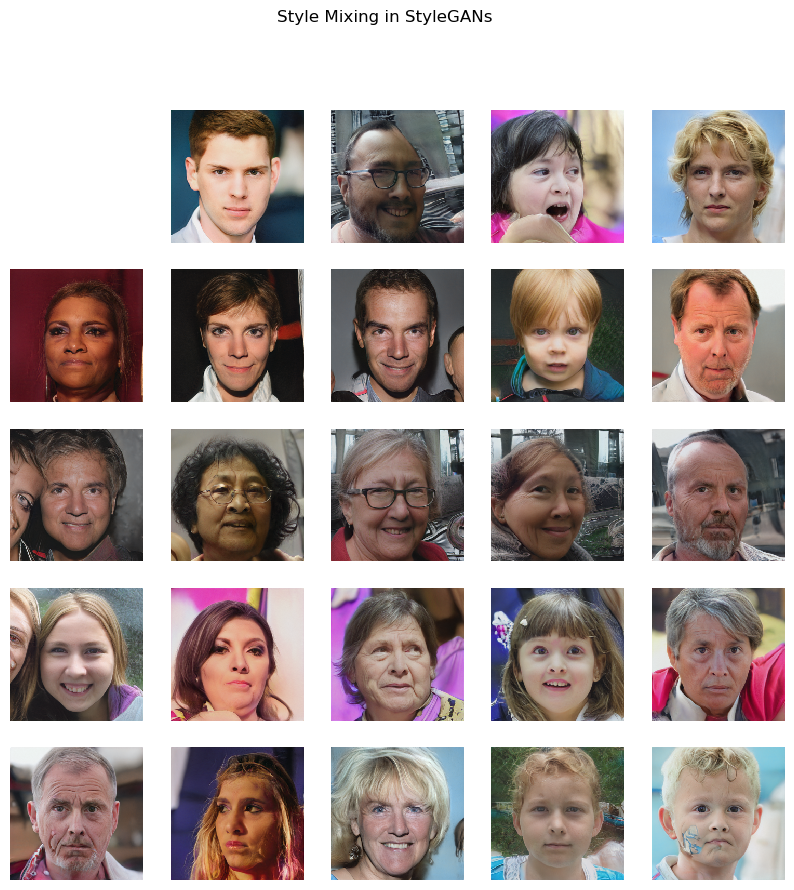

In [79]:
noise_a = []
noise_b = []
for i in range(0,4):
    noise_a.append(torch.randn(1, generator.z_dim).to(device))
    noise_b.append(torch.randn(1, generator.z_dim).to(device))

_,ax     = plt.subplots(5,5, figsize = (10,10))
plt.suptitle('Style Mixing in StyleGANs')

for i in ax:
    for j in i:
        j.axis("off")

for i in range(1,5):
    img = generator(noise_a[i-1], torch.zeros([1, generator.c_dim]).to(device)).permute(0,2,3,1).cpu().detach().numpy()[0]
    img = (img-img.min())/(img.max()-img.min())
    ax[0][i].imshow(img)

    img = (generator(noise_b[i-1], torch.zeros([1, generator.c_dim]).to(device)).permute(0,2,3,1).cpu().detach().numpy()[0])
    img = (img-img.min())/(img.max()-img.min())
    ax[i][0].imshow(img)

for i in range(1,5):
    for j in range(1,5):
        img = (generator(noise_a[i-1]+ noise_b[j-1], torch.zeros([1, generator.c_dim]).to(device)).permute(0,2,3,1).cpu().detach().numpy()[0])
        img = (img-img.min())/(img.max()-img.min())
        ax[i][j].imshow(img)


plt.show()

In [83]:
for param in generator.parameters():
    param.requires_grad = False

for param in discriminator.parameters():
    param.requires_grad = False

In [92]:
custom_mapping_network = networks.MappingNetwork(512,0,512,14,num_layers= 8,lr_multiplier= 0.01,w_avg_beta= 0.995)

target_domain_classifier = networks.

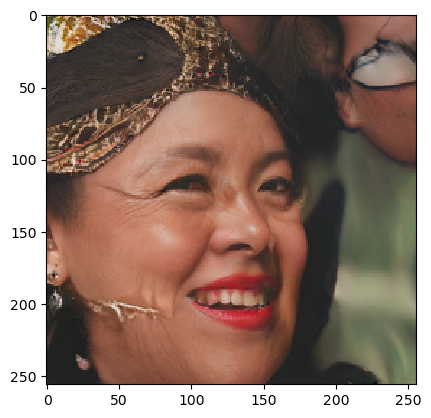

In [111]:
img = generator(torch.randn(1,generator.z_dim).to(device),torch.zeros(1,generator.c_dim).to(device)).permute(0,2,3,1).cpu().detach().numpy()[0]

img = (img - img.min())/(img.max()- img.min())
plt.imshow(img)